In [1]:
!pip install tensorflow
!pip install yfinance

In [76]:
import math
import pandas as web
import numpy as np
import pandas as pd
import numpy as scaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [4]:
df = yf.download('AAPL', start='2015-01-01', end='2022-12-17',interval='1d')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531767,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840668,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177240,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106184,237458000
...,...,...,...,...,...,...
2022-12-12,142.699997,144.500000,141.059998,144.490005,144.070450,70462700
2022-12-13,149.500000,149.970001,144.240005,145.470001,145.047607,93886200
2022-12-14,145.350006,146.660004,141.160004,143.210007,142.794174,82291200


In [5]:
df.shape

(2005, 6)

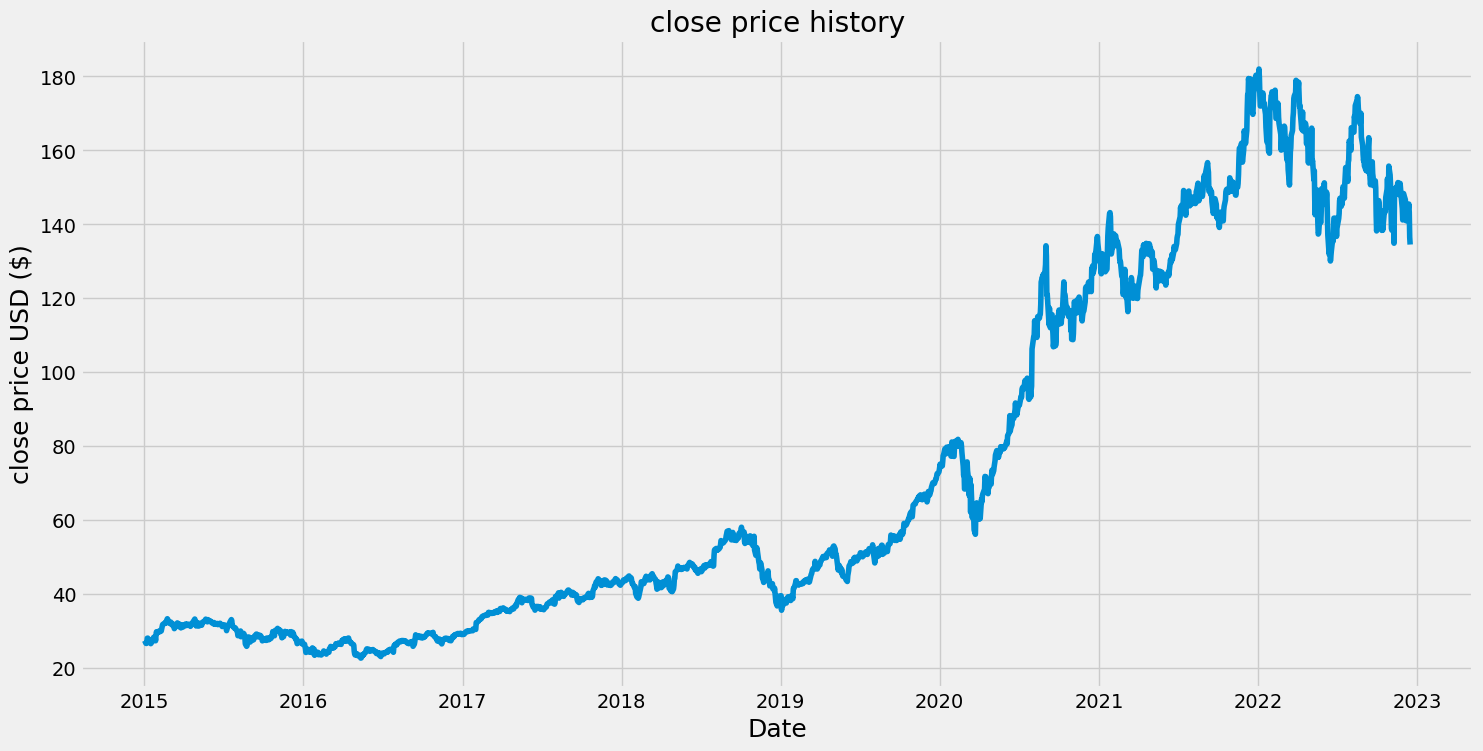

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.show()

In [7]:
data = df.filter(['close'])
#Convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)* .8)

training_data_len

1604

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.03339474, 0.03088629, 0.02851629, 0.0297789 , 0.02304538,
        0.28946222],
       [0.02855492, 0.02652752, 0.02542225, 0.02494904, 0.01871464,
        0.3616941 ],
       [0.02582277, 0.02462154, 0.02417824, 0.02496473, 0.01872869,
        0.37154761],
       ...,
       [0.76718917, 0.77328189, 0.75783485, 0.75662544, 0.76413032,
        0.07674878],
       [0.74071065, 0.74291116, 0.72510807, 0.71453664, 0.72220444,
        0.10386727],
       [0.71310809, 0.71697725, 0.71043523, 0.70205425, 0.70977042,
        0.20364249]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
       print(x_train)
       print(y_train)
       print()

[array([0.03339474, 0.02855492, 0.02582277, 0.02685318, 0.03002249,
       0.03539311, 0.03528383, 0.03345719, 0.02972585, 0.03122463,
       0.02658777, 0.02785236, 0.02958533, 0.03163055, 0.03481547,
       0.03706363, 0.03500281, 0.04313682, 0.04109161, 0.04433898,
       0.04379255, 0.0444951 , 0.0444951 , 0.04686816, 0.04686816,
       0.04457316, 0.04710235, 0.05116155, 0.056298  , 0.05820271,
       0.05853056, 0.05874914, 0.06007618, 0.06029475, 0.06248049,
       0.06703928, 0.06488478, 0.06056016, 0.06244926, 0.06127833,
       0.06082559, 0.06104416, 0.06023231, 0.05995128, 0.05926434,
       0.05684444, 0.05425279, 0.05044338, 0.05370636, 0.05289452,
       0.05604821, 0.05776556, 0.06049772, 0.0597171 , 0.05795292,
       0.05812465, 0.0570474 , 0.05114595, 0.05397177, 0.05315994])]
[0.05634483737807644]

[array([0.03339474, 0.02855492, 0.02582277, 0.02685318, 0.03002249,
       0.03539311, 0.03528383, 0.03345719, 0.02972585, 0.03122463,
       0.02658777, 0.02785236, 0.02

In [38]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1544, 60, 1)

In [52]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1544/1544 [==============================] - 32s 19ms/step - loss: 0.0012


In [15]:
test_data = scaled_data[training_data_len - 60: , :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [16]:
x_test = np.array(x_test)

In [36]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [135]:
predictions = model.predict(x_test)


1/1 [==============================] - 0s 19ms/step


In [136]:
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [137]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['close','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

ValueError: ignored

In [129]:
valid

""
Date
2021-05-18
2021-05-19
2021-05-20
2021-05-21
2021-05-24
...
2022-12-12
2022-12-13
2022-12-14


In [130]:
#get the quote
apple_quote = yf.download('AAPL', start ='2012-01-01', end ='2019-12-17', interval='1d')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
#create an empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days)
#convert the x_test date set to a numpy array
x_test = np.array(x_test)
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling

print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 19ms/step
[[0.0261102]]


In [131]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [132]:
apple_quote2 = yf.download('AAPL', start='2015-01-01', end='2022-12-17')
apple_quote2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531761,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840666,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177235,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106186,237458000
...,...,...,...,...,...,...
2022-12-12,142.699997,144.500000,141.059998,144.490005,144.070450,70462700
2022-12-13,149.500000,149.970001,144.240005,145.470001,145.047607,93886200
2022-12-14,145.350006,146.660004,141.160004,143.210007,142.794174,82291200


AttributeError: ignored